In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Housing_group.csv')
df.head()   

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.04,32.54,7,938,297.0,1187,282,12667,67500,NEAR OCEAN
1,-117.04,32.55,15,2206,648.0,2511,648,16348,93200,NEAR OCEAN
2,-117.06,32.55,5,3223,940.0,3284,854,14384,108800,NEAR OCEAN
3,-117.09,32.55,8,6533,1217.0,4797,1177,39583,144400,NEAR OCEAN
4,-117.05,32.56,18,1215,320.0,1195,349,19875,114900,NEAR OCEAN


In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,38706.710029,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,18998.217179,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,4999.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,25634.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,35348.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,47432.500000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,150001.000000,500001.000000


In [13]:
# David

for column in df:
    if df[column].isnull().values.any():
        print('Column', column, 'has missing values')

missing_values = df['total_bedrooms'].isna().sum().sum()
total_values = len(df.index)

print('total_bedrooms has', missing_values, 'missing values. This is relative to the total of', total_values , 'values')

Column total_bedrooms has missing values
total_bedrooms has 207 missing values. This is relative to the total of 20640 values


The exploration plots show many capped values, such as median_house_value (around 500.000), median_age and median_income


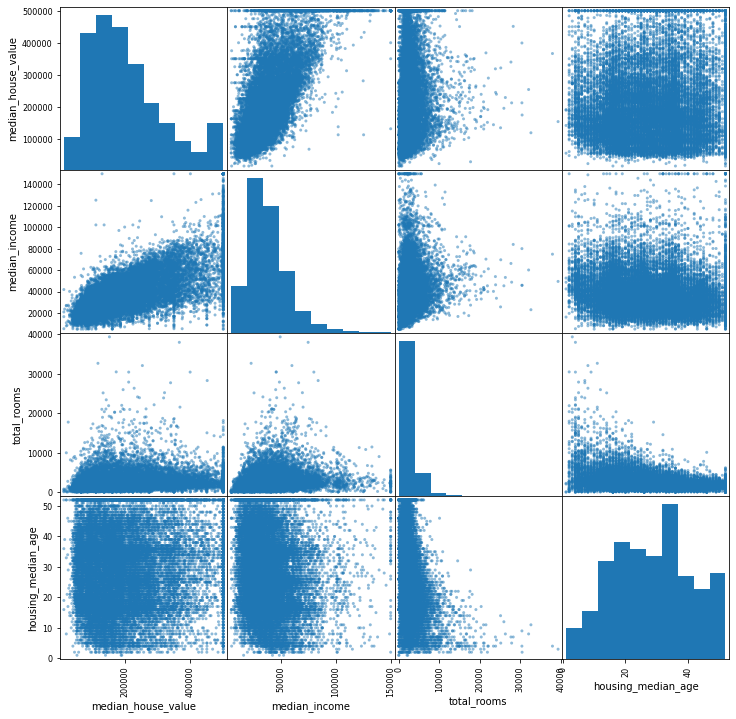

In [14]:
# David
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(12,12))

print('The exploration plots show many capped values, such as median_house_value (around 500.000), median_age and median_income')

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

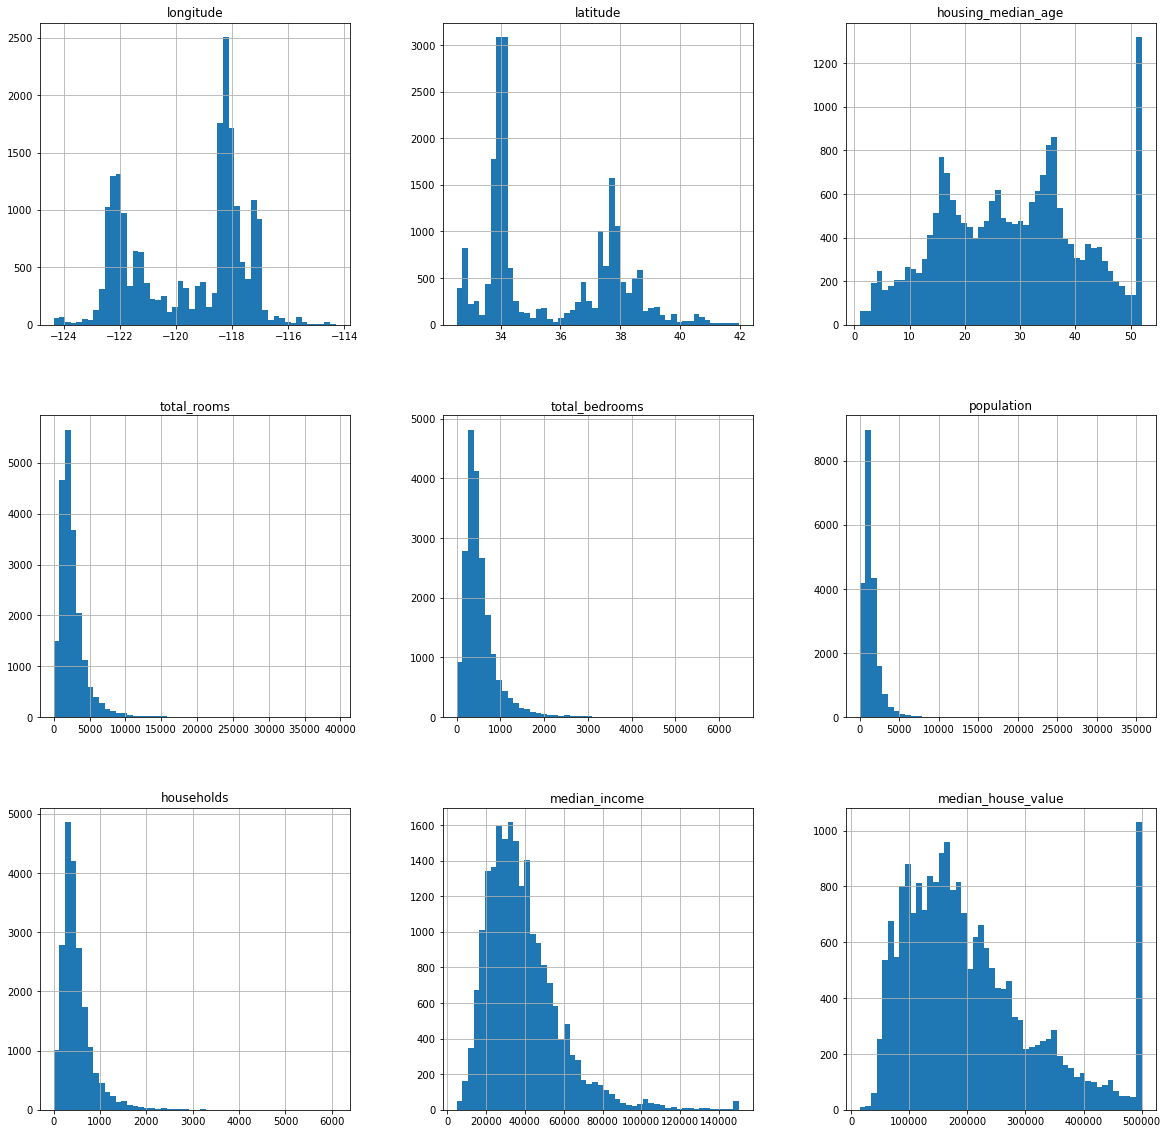

In [15]:
#Lawrence
df.hist(bins=50, figsize=(20, 20))

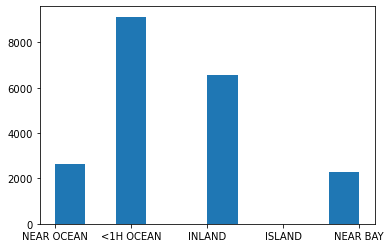

In [16]:
#Sevilio
plt.hist(df['ocean_proximity'], bins=10)
plt.show()

In [17]:
#Lawrence
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


**Conclusion:**
The correlation matrix depicts how the variables are related and to what degree.
Variables that have a correlation value of more than 0.7 would result in multicollinearity.
Multi-variate regressions should therefore omit one of the two independent variables.

In [139]:
# David

fig = px.density_mapbox(df, lat='latitude', lon='longitude', radius=5,
                        center=dict(lat=37.5, lon=-118), zoom=4,
                        mapbox_style="open-street-map")
fig.show()

In [83]:
import statsmodels.formula.api as smf

In [84]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.04,32.54,7,938,297.0,1187,282,12667,67500,NEAR OCEAN
1,-117.04,32.55,15,2206,648.0,2511,648,16348,93200,NEAR OCEAN


***Hypothesis Testing***
H0: The proximity to the ocean has no effect on the housing price.
HA: Housing prices increase if the proximity to the bay is closer.

Model: multiple regression: Y = median_house_value = Intercept + (age * x) + (rooms * x) + (bedrooms * x) + (population * x) + (households * x) + (income * x) + e

Model: Y = median_house_value = Intercept + (age * x) + (rooms * x) + (bedrooms * x) + (population * x) + (households * x) + (income * x) + (proximity * x) + e

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
housing_median_age0 = df['housing_median_age'].to_list()
median_income0 = df['median_income'].to_list()
median_house_value0 = df['median_house_value'].to_list()

In [167]:
housing_median_age1 = np.array([housing_median_age0]).reshape((-1,1))
median_income1 = np.array([median_income0]).reshape((-1,1))
median_house_value1 = np.array([median_house_value0]).reshape((-1,1))

In [169]:
X = []
for i in range(len(housing_median_age1)):
    X.append([housing_median_age1[i], median_income1[i]])
X_data = np.array(X)

In [172]:
model2 = LinearRegression().fit(X_data, median_house_value1)
b0 = model2.intercept_
b12 = model2.coef_
print("b0 = ", b0)
print("b1 , b2 = ", b12)
r_sq = model2.score(X_data, median_house_value1)
print("Coefficent of Determination = ",r_sq)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [153]:
model2 = LinearRegression().fit(housing_median_age1, df['median_house_value'])
b0 = model2.intercept_
b12 = model2.coef_
print("b0 = ", b0)
print("b1 = ", b12)
r_sq = model2.score(housing_median_age1, df['median_house_value'])
print("Coefficent of Determination = ",r_sq)

b0 =  179119.91658938478
b1 =  [968.44963974]
Coefficent of Determination =  0.011156305266710853


In [111]:
model1 = smf.mixedlm("median_house_value ~ median_income + C(ocean_proximity)", df, groups= "ocean_proximity").fit()
model1.summary()
# This is a Random intercept model, where I have specified that within the fixed factor 'ocean_proximity', 
# 'Male' is the desired reference group

c:\Users\Lawrence\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning:

The Hessian matrix at the estimated parameter values is not positive definite.



<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
===============================================================================================
Model:                       MixedLM           Dependent Variable:           median_house_value
No. Observations:            20640             Method:                       REML              
No. Groups:                  5                 Scale:                        5487353124.2954   
Min. group size:             5                 Log-Likelihood:               -260676.8058      
Max. group size:             9136              Converged:                    Yes               
Mean group size:             4128.0                                                            
-----------------------------------------------------------------------------------------------
                                     Coef.       Std.Err.     z    P>|z|    [0.025     0.975]  
-----------------------------------------------------------------------------------------------
Intercept                             83470.012  74089.993   1.127 0.260  -61743.706 228683.730
C(ocean_proximity)[T.INLAND]         -77457.440 104767.363  -0.739 0.460 -282797.698 127882.817
C(ocean_proximity)[T.ISLAND]         195375.174 109876.858   1.778 0.075  -19979.512 410729.859
C(ocean_proximity)[T.NEAR BAY]        21267.601 104774.429   0.203 0.839 -184086.506 226621.708
C(ocean_proximity)[T.NEAR OCEAN]      17675.087 104772.872   0.169 0.866 -187675.969 223026.143
median_income                             3.702      0.028 132.384 0.000       3.647      3.757
ocean_proximity Var              5487353124.295                                                
===============================================================================================

"""

In [110]:
model2 = smf.mixedlm("median_house_value ~ median_income + C(ocean_proximity)", df, groups= df["ocean_proximity"], vc_formula = {"ocean_proximity" : "0 + C(ocean_proximity)"}).fit() 
model2.summary()

c:\Users\Lawrence\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning:

The Hessian matrix at the estimated parameter values is not positive definite.



<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
===============================================================================================
Model:                       MixedLM           Dependent Variable:           median_house_value
No. Observations:            20640             Method:                       REML              
No. Groups:                  5                 Scale:                        5487353124.2954   
Min. group size:             5                 Log-Likelihood:               -260676.8058      
Max. group size:             9136              Converged:                    Yes               
Mean group size:             4128.0                                                            
-----------------------------------------------------------------------------------------------
                                     Coef.       Std.Err.     z    P>|z|    [0.025     0.975]  
-----------------------------------------------------------------------------------------------
Intercept                             83470.012  74089.993   1.127 0.260  -61743.706 228683.730
C(ocean_proximity)[T.INLAND]         -77457.440 104767.363  -0.739 0.460 -282797.698 127882.817
C(ocean_proximity)[T.ISLAND]         195375.174 109876.858   1.778 0.075  -19979.512 410729.859
C(ocean_proximity)[T.NEAR BAY]        21267.601 104774.429   0.203 0.839 -184086.506 226621.708
C(ocean_proximity)[T.NEAR OCEAN]      17675.087 104772.872   0.169 0.866 -187675.969 223026.143
median_income                             3.702      0.028 132.384 0.000       3.647      3.757
ocean_proximity Var              5487353124.295                                                
===============================================================================================

"""

In [112]:
model4 = smf.mixedlm("median_house_value ~ median_income + C(ocean_proximity)", df, groups= "ocean_proximity", re_formula= "1 + C(ocean_proximity)").fit()
model4.summary()

LinAlgError: Singular matrix